# Backpropagation

Anggota Kelompok 1 :
- Fahmi Noordin Rumagutawan     (215150200111071)
- Ahmad Thariq                  (215150207111034)
- Muhamad Taufik Hakim          (215150207111062)
- Ade Arya Dwi Syahputra        (215150207111002)
- Ikrar Budidharma 				      (215150207111011)


---

Dataset yang Digunakan merupakan Heart Failure dari Kaggle:
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


## 1) Fungsi-Fungsi Backpropagation

**Import Library**

In [129]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### a) Fungsi aktivasi *Sigmoid* dan *Hyperbolic Tangent*

In [130]:
#Fungsi Aktivasi Sigmoid dengan turunannya
def sig(x):
    #Fungsi aktivasi Sigmoid.
    return 1 / (1 + np.exp(-x))

def sigd(x):
    #Turunan fungsi aktivasi Sigmoid.
    return sig(x) * (1 - sig(x))

#Fungsi Aktivasi Hyperbolic Tangent dengan turunannya
def tanh(x):
    #Fungsi aktivasi Hyperbolic Tangent.
    return np.tanh(x)

def tanh_derivative(x):
    #Turunan fungsi aktivasi Hyperbolic Tangent.
    return 1 - np.tanh(x)**2

### b) Fungsi *Binary Encoding* dan *Decoding*

In [131]:
def onehot_enc(lbl, min_val=0):
  mi = min(lbl)
  enc = np.full((len(lbl), max(lbl) - mi + 1), min_val, np.int8)

  for i, x in enumerate(lbl):
    enc[i, x - mi] = 1

  return enc

def onehot_dec(enc, mi=0):
  return [np.argmax(e) + mi for e in enc]

### c) Fungsi *Training* Backpropagation


**Fungsi Training menggunakan Sigmoid**

In [132]:
def bp_fit_sig(X, target, layer_conf, max_epoch, max_error=0.1, learn_rate=0.1, print_per_epoch=100):
    print('===== TRAINING =====')
    start_time = time.time()
    np.random.seed(1)
    nin = [np.empty(i) for i in layer_conf]
    n = [np.empty(j + 1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]
    w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) for i in range(len(layer_conf) - 1)])
    dw = [np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)]
    d = [np.empty(s) for s in layer_conf[1:]]
    din = [np.empty(s) for s in layer_conf[1:-1]]
    epoch = 0
    mse = 1

    for i in range(0, len(n) - 1):
        n[i][-1] = 1
    while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
        epoch += 1
        mse = 0

        for r in range(len(X)):
            n[0][:-1] = X[r]

            for L in range(1, len(layer_conf)):
                nin[L] = np.dot(n[L - 1], w[L - 1])
                n[L][:len(nin[L])] = sig(nin[L])

            e = target[r] - n[-1]
            mse += sum(e ** 2)
            d[-1] = e * sigd(nin[-1])
            dw[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))

            for L in range(len(layer_conf) - 1, 1, -1):
                din[L - 2] = np.dot(d[L - 1], np.transpose(w[L - 1][:-1]))
                d[L - 2] = din[L - 2] * np.array(sigd(nin[L - 1]))
                dw[L - 2] = (learn_rate * d[L - 2]) * n[L - 2].reshape((-1, 1))

            w += dw

        mse /= len(X)
        if print_per_epoch > -1 and epoch % print_per_epoch == 0:
            print(f'Epoch {epoch}, MSE: {mse}')

    execution = time.time() - start_time
    print("Waktu eksekusi: %s detik" % execution)
    return w, epoch, mse

**Fungsi Training menggunakan Hyperbolic Tangent**

In [133]:
def bp_fit_tanh(X, target, layer_conf, max_epoch, max_error=.1, learn_rate=.1, print_per_epoch=100):
    print('===== TRAINING =====')
    np.random.seed(1)
    start_time = time.time()
    np.random.seed(1)
    nin = [np.empty(i) for i in layer_conf]
    n = [np.empty(j + 1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]
    w = [np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) for i in range(len(layer_conf) - 1)]
    w = np.array(w, dtype=object)
    dw = [np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)]
    d = [np.empty(s) for s in layer_conf[1:]]
    din = [np.empty(s) for s in layer_conf[1:-1]]
    epoch = 0
    mse = 1

    for i in range(0, len(n)-1):
        n[i][-1] = 1

    while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
        epoch += 1
        mse = 0

        for r in range(len(X)):
            n[0][:-1] = X[r]

            for L in range(1, len(layer_conf)):
                nin[L] = np.dot(n[L-1], w[L-1])
                n[L][:len(nin[L])] = tanh(nin[L])

            e = target[r] - n[-1]
            mse += sum(e ** 2)
            d[-1] = e * tanh_derivative(nin[-1])
            dw[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))

            for L in range(len(layer_conf) - 1, 1, -1):
                din[L-2] = np.dot(d[L-1], np.transpose(w[L-1][:-1]))
                d[L-2] = din[L-2] * np.array(tanh_derivative(nin[L-1]))
                dw[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))

            for i in range(len(w)):
              w[i] += dw[i]

        mse /= len(X)

        if print_per_epoch > -1 and epoch % print_per_epoch == 0:
            print(f'Epoch {epoch}, MSE: {mse}')

    execution = time.time() - start_time
    print("Waktu eksekusi: %s detik" % execution)
    return w, epoch, mse

### d) Fungsi *Testing* Backpropagation

**Fungsi Testing menggunakan Sigmoid**

In [134]:
def bp_predict_sig(X, w):
  print('===== TESTING =====')
  n = [np.empty(len(i)) for i in w]
  nin = [np.empty(len(i[0])) for i in w]
  predict = []
  n.append(np.empty(len(w[-1][0])))
  for x in X:
    n[0][:-1] = x
    for L in range(0, len(w)):
      nin[L] = np.dot(n[L], w[L])
      n[L + 1][:len(nin[L])] = sig(nin[L])
    predict.append(n[-1].copy())
  return predict

**Fungsi Testing menggunakan Hyperbolic Tangent**

In [135]:
def bp_predict_tanh(X, w):
    print('===== TESTING =====')
    n = [np.empty(len(i)) for i in w]
    nin = [np.empty(len(i[0])) for i in w]
    predict = []
    n.append(np.empty(len(w[-1][0])))

    for x in X:
        n[0][:-1] = x

        for L in range(0, len(w)):
            nin[L] = np.dot(n[L], w[L])
            n[L + 1][:len(nin[L])] = tanh(nin[L])

        predict.append(n[-1].copy())

    return predict

## 2) Preprocessing Dataset Heart Disease


**Import Data**

In [136]:
from google.colab import files
uploaded = files.upload()

**Membaca dataset yang sudah diupload**

In [137]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
3,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
4,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


**Mengubah Data String ke Numerik**

In [138]:
data['Sex'].replace(['M', 'F'],[0, 1], inplace=True)
data['ChestPainType'].replace(['TA', 'ATA', 'NAP', 'ASY'],[0, 1, 2, 3], inplace=True)
data['RestingECG'].replace(['Normal', 'ST', 'LVH'],[0, 1, 2], inplace=True)
data['ExerciseAngina'].replace(['Y','N'],[0, 1], inplace=True)
data['ST_Slope'].replace(['Up','Flat','Down'],[0, 1, 2], inplace=True)

In [139]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,1,0.0,0,0
1,37,0,1,130,283,0,1,98,1,0.0,0,0
2,48,1,3,138,214,0,0,108,0,1.5,1,1
3,54,0,2,150,195,0,0,122,1,0.0,0,0
4,39,0,2,120,339,0,0,170,1,0.0,0,0


**Melihat Jumlah Distribusi data antara label 0 dan 1**

In [140]:
class HeartDiseaseCounter:
    def __init__(self, dataset):
        self.dataset = dataset

    def count_zeros(self):
        return (self.dataset['HeartDisease'] == 0).sum()

    def count_ones(self):
        return (self.dataset['HeartDisease'] == 1).sum()

In [141]:
counter = HeartDiseaseCounter(data)

# Get the counts
count_of_zeros = counter.count_zeros()
count_of_ones = counter.count_ones()

print(f"jumlah 0: {count_of_zeros}")
print(f"jumlah 1: {count_of_ones}")

jumlah 0: 400
jumlah 1: 400


**Mengecek Data**

In [142]:
def imputasi(df_input):
    column = df_input.select_dtypes(float).columns
    class_column = df_input.columns[-1]
    for item in column:
        df_input[item].fillna(df_input.groupby(class_column)[item].transform('mean').round(2), inplace=True)
    return df_input

In [143]:
imputasi(data).isnull().values.any()

False

In [144]:
def cetak_rentang(df_input):
  list_fitur = df_input.columns[:-1]
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    print("Rentang fitur",fitur,"adalah",max-min)

In [145]:
cetak_rentang(data)

Rentang fitur Age adalah 49
Rentang fitur Sex adalah 1
Rentang fitur ChestPainType adalah 3
Rentang fitur RestingBP adalah 120
Rentang fitur Cholesterol adalah 603
Rentang fitur FastingBS adalah 1
Rentang fitur RestingECG adalah 2
Rentang fitur MaxHR adalah 139
Rentang fitur ExerciseAngina adalah 1
Rentang fitur Oldpeak adalah 8.8
Rentang fitur ST_Slope adalah 2


## 3) Pelatihan Dataset Heart Disease

### a) Pelatihan menggunakan *Sigmoid*

**Pelatihan**

In [146]:
# Inisialisasi X dan Y
X = data.drop('HeartDisease', axis=1)
Y = onehot_enc(data['HeartDisease'].values)

# Normalisasi Fitur Min-Max scaling
X = minmax_scale(X)

#Train Test Split dengan 70% Training dan 30% Testing
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.3,random_state=1)
#Pelatihan menggunakan Sigmoid
w, ep, mse = bp_fit_sig(X_train, y_train, layer_conf=(11, 10, 2), learn_rate=0.1, max_epoch=100, max_error=0.1, print_per_epoch=25)

print(f'Epochs: {ep}, MSE: {mse}')

predict = bp_predict_sig(X_test, w)
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)
accuracy = accuracy_score(predict, y_test)

print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

===== TRAINING =====


<ipython-input-132-bd53a60167ae>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) for i in range(len(layer_conf) - 1)])
<ipython-input-132-bd53a60167ae>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w += dw


Epoch 25, MSE: 0.22533394642366625
Epoch 50, MSE: 0.21885561357489194
Epoch 75, MSE: 0.21287988685831558
Epoch 100, MSE: 0.20754412352893778
Waktu eksekusi: 6.742859840393066 detik
Epochs: 100, MSE: 0.20754412352893778
===== TESTING =====
Output: [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
True : [0, 0, 1, 1, 0, 0, 1, 1, 

**Melihat precision, recall, f1-score, dan akurasi model dengan classification_report**

In [147]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.86      0.86      0.86       123

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



**Confusion Matrix**

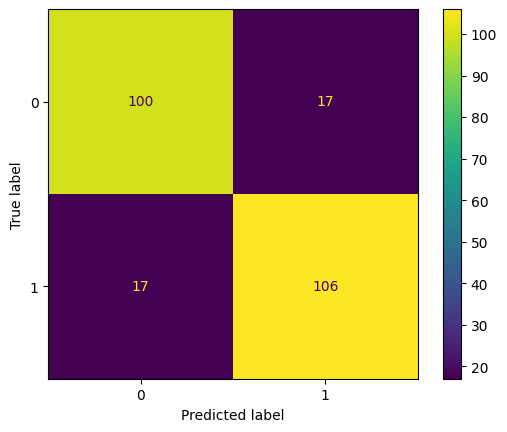

In [148]:
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

### b) Pelatihan menggunakan *Hyperbolic Tangent*

**Pelatihan**

In [149]:
# Inisialisasi X dan Y
X = data.drop('HeartDisease', axis=1)
Y = onehot_enc(data['HeartDisease'].values)

# Normalisasi Fitur Min-Max scaling
X = minmax_scale(X)

#Train Test Split dengan 70% Training dan 30% Testing
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.3,random_state=1)
#Pelatihan menggunakan Hyperbolic Tangent
w, ep, mse = bp_fit_tanh(X_train, y_train, layer_conf=(11, 10, 2), learn_rate=0.1, max_epoch=100, max_error=0.1, print_per_epoch=25)

print(f'Epochs: {ep}, MSE: {mse}')

predict = bp_predict_tanh(X_test, w)
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)
accuracy = accuracy_score(predict, y_test)

print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

===== TRAINING =====
Epoch 25, MSE: 0.3096148189764322
Epoch 50, MSE: 0.2584278334796191
Epoch 75, MSE: 0.2369274427254589
Epoch 100, MSE: 0.2289835154871812
Waktu eksekusi: 4.573460817337036 detik
Epochs: 100, MSE: 0.2289835154871812
===== TESTING =====
Output: [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
True : [0, 0, 1,

**Melihat precision, recall, f1-score, dan akurasi model dengan classification_report**

In [150]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       117
           1       0.84      0.87      0.86       123

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240



**Confusion Matrix**

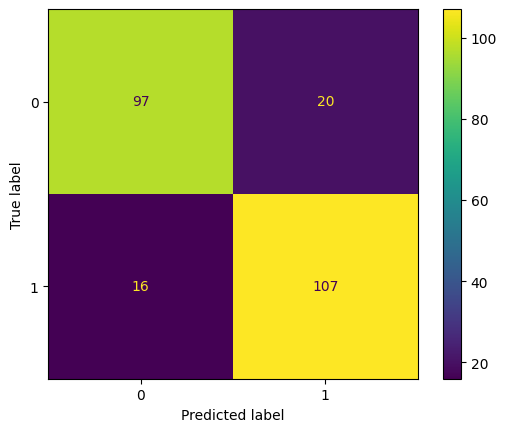

In [151]:
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()